In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

In [3]:
town = "grenoble"
t = "Type" if town != "pim" else "type"
df_nodes = pd.read_csv(f"{town}/nodes.csv", sep=";")
X = np.array(df_nodes['X'])
Y = np.array(df_nodes['Y'])
C = np.where(df_nodes[t] == 'distribution')[0]
T = np.where(df_nodes[t] != 'distribution')[0]

In [4]:
T.size / C.size

5.5

In [5]:
D = np.concatenate([[0], np.array(pd.read_csv(f"{town}/distances.csv", sep=";")).reshape(-1)])
D = D.reshape((X.size, X.size))

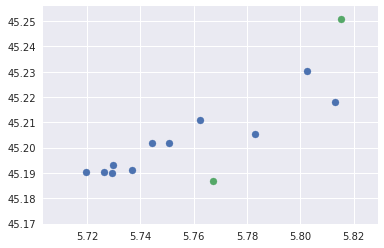

In [6]:
plt.scatter(X[T], Y[T])
plt.scatter(X[C], Y[C])

In [7]:
np.mean(D)

371.49112426035504

In [8]:
from collections import defaultdict, namedtuple


Arc = namedtuple('Arc', ('tail', 'weight', 'head'))


def min_spanning_arborescence(arcs, sink):
    good_arcs = []
    quotient_map = {arc.tail: arc.tail for arc in arcs}
    quotient_map[sink] = sink
    while True:
        min_arc_by_tail_rep = {}
        successor_rep = {}
        for arc in arcs:
            if arc.tail == sink:
                continue
            tail_rep = quotient_map[arc.tail]
            head_rep = quotient_map[arc.head]
            if tail_rep == head_rep:
                continue
            if tail_rep not in min_arc_by_tail_rep or min_arc_by_tail_rep[tail_rep].weight > arc.weight:
                min_arc_by_tail_rep[tail_rep] = arc
                successor_rep[tail_rep] = head_rep
        cycle_reps = find_cycle(successor_rep, sink)
        if cycle_reps is None:
            good_arcs.extend(min_arc_by_tail_rep.values())
            return spanning_arborescence(good_arcs, sink)
        good_arcs.extend(min_arc_by_tail_rep[cycle_rep] for cycle_rep in cycle_reps)
        cycle_rep_set = set(cycle_reps)
        cycle_rep = cycle_rep_set.pop()
        quotient_map = {node: cycle_rep if node_rep in cycle_rep_set else node_rep for node, node_rep in quotient_map.items()}


def find_cycle(successor, sink):
    visited = {sink}
    for node in successor:
        cycle = []
        while node not in visited:
            visited.add(node)
            cycle.append(node)
            node = successor[node]
        if node in cycle:
            return cycle[cycle.index(node):]
    return None


def spanning_arborescence(arcs, sink):
    arcs_by_head = defaultdict(list)
    for arc in arcs:
        if arc.tail == sink:
            continue
        arcs_by_head[arc.head].append(arc)
    solution_arc_by_tail = {}
    stack = arcs_by_head[sink]
    while stack:
        arc = stack.pop()
        if arc.tail in solution_arc_by_tail:
            continue
        solution_arc_by_tail[arc.tail] = arc
        stack.extend(arcs_by_head[arc.tail])
    return solution_arc_by_tail


print(min_spanning_arborescence([Arc(1, 17, 0), Arc(2, 16, 0), Arc(3, 19, 0), Arc(4, 16, 0), Arc(5, 16, 0), Arc(6, 18, 0), Arc(2, 3, 1), Arc(3, 3, 1), Arc(4, 11, 1), Arc(5, 10, 1), Arc(6, 12, 1), Arc(1, 3, 2), Arc(3, 4, 2), Arc(4, 8, 2), Arc(5, 8, 2), Arc(6, 11, 2), Arc(1, 3, 3), Arc(2, 4, 3), Arc(4, 12, 3), Arc(5, 11, 3), Arc(6, 14, 3), Arc(1, 11, 4), Arc(2, 8, 4), Arc(3, 12, 4), Arc(5, 6, 4), Arc(6, 10, 4), Arc(1, 10, 5), Arc(2, 8, 5), Arc(3, 11, 5), Arc(4, 6, 5), Arc(6, 4, 5), Arc(1, 12, 6), Arc(2, 11, 6), Arc(3, 14, 6), Arc(4, 10, 6), Arc(5, 4, 6)], 0))


{2: Arc(tail=2, weight=16, head=0), 4: Arc(tail=4, weight=8, head=2), 5: Arc(tail=5, weight=6, head=4), 6: Arc(tail=6, weight=4, head=5), 1: Arc(tail=1, weight=3, head=2), 3: Arc(tail=3, weight=3, head=1)}
